<a href="https://colab.research.google.com/github/karthik038/Assignment8-Task6/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools
from sklearn import linear_model, pipeline, preprocessing

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [35]:
df = pd.read_csv("car_data.csv")

### Tasks, Part 1 (i)

In [36]:
X = df[['Price']]
y = df[['Mileage']]

In [37]:
regressor = linear_model.LinearRegression()
regressor.fit(X, y)

LinearRegression()

### Tasks, Part 1 (ii)

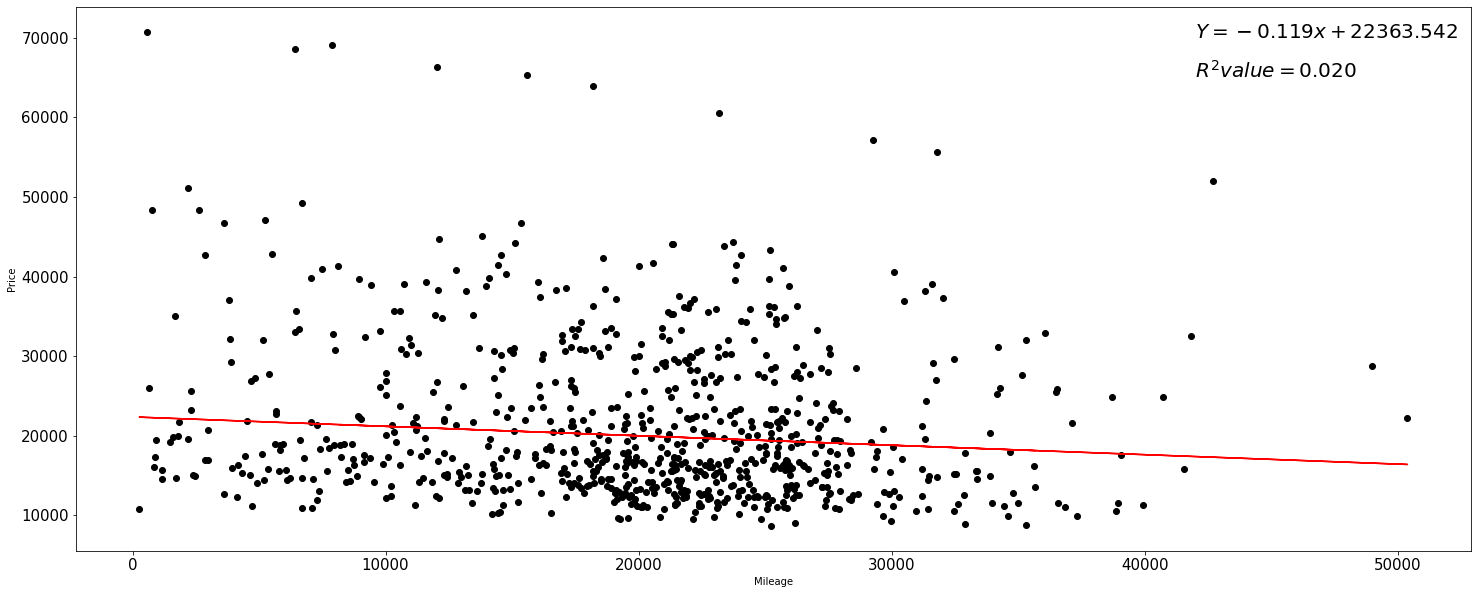

In [38]:
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(25, 10))

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.scatter(y, X, color='black') 
plt.plot(y, regressor.predict(y), color='red')

plt.text(42000, 70000, '$Y = %.3fx + %.3f$' % (regressor.coef_, regressor.intercept_), fontsize=20)
plt.text(42000, 65000, '$R^2 value = %.3f$'% regressor.score(X, y), fontsize=20)

plt.ylabel("Price")
plt.xlabel('Mileage')

plt.show()

### Tasks, Part 1 (iii)

In [39]:
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)

Intercept: [22363.54215594]
Coefficients: [[-0.11861458]]


In [40]:
print('R-squared:', regressor.score(X, y).round(5))
print('The R^2 value of {} is too low. Hence the equation is not a good fit for the data.'.format(regressor.score(X, y).round(5)))

R-squared: 0.02046
The R^2 value of 0.02046 is too low. Hence the equation is not a good fit for the data.


### Tasks, Part 2 (i)

In [41]:
MCLDCSL_ft = ["Mileage", "Cylinder", "Liter","Doors","Cruise","Sound","Leather"]
price = ["Price"]

X_MCLDCSL = df[MCLDCSL_ft]
y_MCLDCSL = df[price]

MCLDCSL_regressor = linear_model.LinearRegression()
MCLDCSL_regressor.fit(X_MCLDCSL, y_MCLDCSL)

y.shape

(804, 1)

### Tasks, Part 2 (ii)

In [42]:
print('R-squared: ', MCLDCSL_regressor.score(X_MCLDCSL, y_MCLDCSL))
print('The R^2 value of {} is decent but does not show a strong correlation and hence is not a good fit for the data.'.format(MCLDCSL_regressor.score(X_MCLDCSL, y_MCLDCSL).round(4)))

R-squared:  0.4462643536728379
The R^2 value of 0.4463 is decent but does not show a strong correlation and hence is not a good fit for the data.


### Tasks, Hard Mode, Part 3 (i)

In [43]:
df_with_dummies = pd.get_dummies(df, columns = ['Make', 'Model', 'Type'])

In [44]:
cols_with_dummies = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Cadillac', 'Make_Saturn','Type_Sedan', 'Type_Coupe', 'Type_Wagon', 'Type_Hatchback', 'Type_Convertible']

X_with_dummies = df_with_dummies[cols_with_dummies]
y_with_dummies = df_with_dummies[['Price']]

regressor_with_dummies = linear_model.LinearRegression()
regressor_with_dummies.fit(X_with_dummies, y_with_dummies)

y_with_dummies.shape

(804, 1)

In [45]:
print('Intercept:', regressor_with_dummies.intercept_)
print('Coefficients:',regressor_with_dummies.coef_)
print('R-squared:', regressor_with_dummies.score(X_with_dummies, y_with_dummies))

Intercept: [23983.77190962]
Coefficients: [[-1.84862466e-01 -1.22610774e+03  5.76120797e+03 -2.06693208e+03
   1.11145653e+02  2.95622523e+02  2.34258573e+02 -3.58669276e+03
  -5.33495094e+03 -5.47974129e+03  6.95098389e+03  1.22732515e+04
  -4.82285042e+03 -1.69110942e+03 -5.49471851e+03  2.37758514e+03
  -1.71994175e+03  6.52818455e+03]]
R-squared: 0.9363889951039477


### Tasks, Hard Mode, Part 3 (ii)

In [46]:
best_combo = []
   
for i in range(1, 11):
    best_combo.append(itertools.combinations(MCLDCSL_ft, i))

In [47]:
from pandas.io.formats.info import DataFrameInfoPrinter
best_score = 0
for combin in best_combo:
    for groupx in combin:
        groupx = list(groupx)
        # print(groupx)
        x = df[groupx]
        # print(x.shape)
        # print(y_with_dummies.shape)
        degrees = 8
        
        for degree in range(1, degrees+1):
          model = pipeline.Pipeline([
                  ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                  ('linear', linear_model.LinearRegression(fit_intercept=False))])
          
          model = model.fit(x, y_with_dummies)
          model_score = model.score(x, y_with_dummies)                   
          # print(model_score)                                                                                                                                                   
        if best_score < model.score(x, y_with_dummies):
          best_score = model.score(x, y_with_dummies)
          maxgroup = groupx
          best_degree = degree
            
print("Degree: ", degree)
print("Best combination of features: ", maxgroup)
print("Best R^2 score: ", best_score)

Degree:  8
Best combination of features:  ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
Best R^2 score:  0.9097847608823275
